# Storytelling Data Visualization on Exchange Rates

## Introducing the Dataset

In [3]:
import pandas as pd

In [4]:
# Read the csv file
exchange_rates = pd.read_csv("euro-daily-hist_1999_2022.csv")
# print the top 5 rows
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-12-15,1.6324,1.9558,5.4085,1.4653,0.9488,7.7812,NaN,24.477,7.4556,...,4.9710,NaN,11.2125,1.456,NaN,NaN,38.119,31.7965,1.0946,19.9801
1,2023-12-14,1.6288,1.9558,5.3349,1.4677,0.949,7.7866,NaN,24.408,7.4566,...,4.9712,NaN,11.18,1.4527,NaN,NaN,38.146,31.6673,1.0919,20.2693
2,2023-12-13,1.6452,1.9558,5.3609,1.4644,0.9452,7.7426,NaN,24.476,7.4566,...,4.9738,NaN,11.277,1.449,NaN,NaN,38.612,31.3399,1.0787,20.587
3,2023-12-12,1.6398,1.9558,5.3327,1.4656,0.9443,7.7447,NaN,24.42,7.4569,...,4.9732,NaN,11.2815,1.4479,NaN,NaN,38.543,31.3765,1.0804,20.4297
4,2023-12-11,1.642,1.9558,5.3169,1.4609,0.9478,7.7206,NaN,24.367,7.4563,...,4.9707,NaN,11.297,1.4454,NaN,NaN,38.402,31.1872,1.0757,20.5441


In [5]:
# print the last bottom 5 rows
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
6451,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6452,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6453,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6454,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6455,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [6]:
# get info of the DataFrame
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

## Data Cleaning

Our focus in the project will be on the exchange rate between the euro and the American dollar. If you want to explore a different currency after finishing the guided part, the code we use for cleaning will come in handy.

In [10]:
# rename columns [US dollar ], Period\\Unit
exchange_rates.rename(columns={"[US dollar ]": "US_dollar", "Period\\Unit:": "Time"}, inplace=True)
# convert data type of column Time to datetime
exchange_rates["Time"] = pd.to_datetime(exchange_rates["Time"])
# sort by column Time
exchange_rates.sort_values("Time", inplace=True)
# reset the current index of the DataFrame
exchange_rates.reset_index(drop=True, inplace=True)
# print the top 5 rows
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [12]:
# create a new dataframe
euro_to_dollar = exchange_rates[["Time", "US_dollar"]].copy()
# count value of column US_dollar
euro_to_dollar["US_dollar"].value_counts() # found 62 '-' characters

US_dollar
-         62
1.2276     9
1.1215     8
1.0888     7
1.0868     7
          ..
1.4304     1
1.4350     1
1.4442     1
1.4389     1
1.0804     1
Name: count, Length: 3769, dtype: int64

In [13]:
# filter out '-' characters
euro_to_dollar = euro_to_dollar[euro_to_dollar["US_dollar"] != "-"]
# check data type after remove '-'
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
# check df info
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6394 entries, 0 to 6455
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6394 non-null   datetime64[ns]
 1   US_dollar  6394 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 149.9 KB


## Rolling Mean

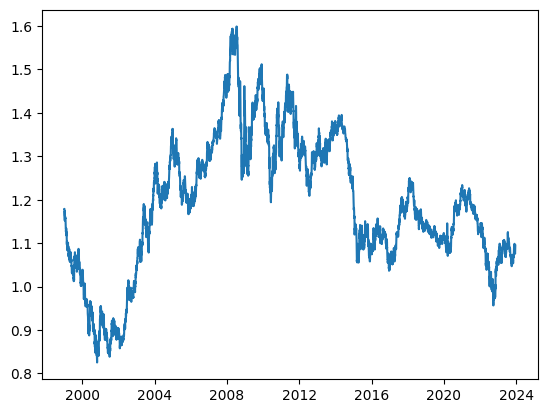

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot to visualize the evolution of the euro-dollar exchange rate
plt.plot(euro_to_dollar["Time"], euro_to_dollar["US_dollar"])
plt.show()

In [ ]:
plt.figure(figsize=(9, 6))

